In [48]:
import csv
import glob
import os
import re
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
os.chdir('C://Users//Ruben//Documents//Scriptie//test-scripts///metadata')
csv_filenames = glob.glob('*.csv')

In [94]:
counts = pd.DataFrame()
list_newspaper_titles = list()

for csv in csv_filenames:
    df = pd.read_csv(csv, sep = "\t")
    df['date'] = df['date'].str[:4]
    df['date'] = df['date'].astype(int)
    
    csv_count = dict()
    
    for year in list(set(df.date)):
        y_df = df[df['date'] == year]
        
        year_count = 0
        
        for art in y_df.ocr:
            tmp = len(art)
            year_count = year_count + tmp
        
        yc_v = {year:year_count}
        csv_count.update(yc_v)
    
    csv_count_df = pd.DataFrame(list(csv_count.items()), columns=['year', 'char_count'])
    csv_count_df['title'] = csv[0:3]
    
    list_newspaper_titles.append(csv[0:3])
    list_newspaper_titles = [w.replace("-", "") for w in list_newspaper_titles]
    
    
    counts = counts.append(csv_count_df)   
counts = counts.pivot(index='year',columns='title')
counts['Total'] = counts.sum(axis=1)
counts['year'] = counts.index
list_newspaper_titles.extend(('total', 'year'))
counts.columns = list_newspaper_titles

In [95]:
list_newspaper_titles

['arc', 'brc', 'dgw', 'nvd', 'ohc', 'tc', 'uc', 'total', 'year']

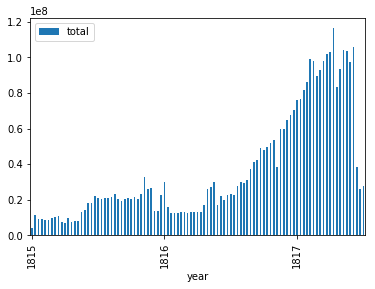

In [96]:
p = counts.plot(x = "year", y = ['total'], kind="bar")
#p.xaxis.set_major_locator(plt.MaxNLocator(3))
#plt.savefig("plot.png", dpi=800)

In [98]:
countsp1 = counts[0:40]


In [99]:
sum(list(countsp1.total)) / 1.

649274891.0